In [11]:
import sys
sys.path.append('/home/stav/Projects/token_voken/')

In [72]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from src.common.path_resolvers import resolve_interval_facial_embeddings_dir, resolve_interval_facial_embedding_path
from src.common.data_loader import load_valid_intervals
from src.common.constants import EMBEDDING_EXTENSION

In [30]:
df_intervals = load_valid_intervals()
df_intervals.shape

(2118, 20)

In [56]:
embedding_records = []

for i, row in df_intervals.iterrows():
    video_id, interval_id = row['video_id'], row['interval_id']
    interval_dir = resolve_interval_facial_embeddings_dir(interval_id)
    filenames = sorted(os.listdir(interval_dir))
    for filename in filenames:
        if filename.endswith(EMBEDDING_EXTENSION):
            frame_id = int(filename.split('.')[0])
            embedding_path = resolve_interval_facial_embedding_path(interval_id, frame_id)
            try:
                embedding = np.load(embedding_path)
            except Exception as e:
                print(f'Error {embedding_path} - {e}')
                embedding = np.zeros(16)
            embedding_records.append([video_id, interval_id, embedding, embedding_path])

Error /home/stav/Data/PATS_DATA/Videos/oliver/i8xwLWb0lLY/214062/FECNet/00055.npy - Cannot load file containing pickled data when allow_pickle=False
Error /home/stav/Data/PATS_DATA/Videos/oliver/ZwY2E0hjGuU/101409/FECNet/00229.npy - Cannot load file containing pickled data when allow_pickle=False
Error /home/stav/Data/PATS_DATA/Videos/oliver/ZwY2E0hjGuU/101409/FECNet/00230.npy - Cannot load file containing pickled data when allow_pickle=False
Error /home/stav/Data/PATS_DATA/Videos/oliver/ZwY2E0hjGuU/101409/FECNet/00231.npy - Cannot load file containing pickled data when allow_pickle=False
Error /home/stav/Data/PATS_DATA/Videos/oliver/ZwY2E0hjGuU/101409/FECNet/00232.npy - Cannot load file containing pickled data when allow_pickle=False
Error /home/stav/Data/PATS_DATA/Videos/oliver/ZwY2E0hjGuU/101409/FECNet/00233.npy - Cannot load file containing pickled data when allow_pickle=False
Error /home/stav/Data/PATS_DATA/Videos/oliver/ZwY2E0hjGuU/101409/FECNet/00234.npy - Cannot load file conta

In [57]:
len(embedding_records)

448610

In [58]:
df_embeddings = pd.DataFrame(embedding_records, columns=['video_id', 'interval_id', 'embedding', 'embedding_path'])

In [59]:
df_embeddings['embedding'][0].shape

(16,)

In [60]:
df_embeddings.head()

,video_id,interval_id,embedding,embedding_path
0,DRauXXz6t0Y,214429,"[0.08211029, -0.14161965, -0.28877425, -0.2099...",/home/stav/Data/PATS_DATA/Videos/oliver/DRauXX...
1,DRauXXz6t0Y,214429,"[0.05263792, -0.15614271, -0.28997123, -0.1713...",/home/stav/Data/PATS_DATA/Videos/oliver/DRauXX...
2,DRauXXz6t0Y,214429,"[0.08566623, -0.13370828, -0.26340023, -0.2189...",/home/stav/Data/PATS_DATA/Videos/oliver/DRauXX...
3,DRauXXz6t0Y,214429,"[0.068895005, -0.16913441, -0.29542175, -0.166...",/home/stav/Data/PATS_DATA/Videos/oliver/DRauXX...
4,DRauXXz6t0Y,214429,"[0.0931093, -0.12990531, -0.28520516, -0.18729...",/home/stav/Data/PATS_DATA/Videos/oliver/DRauXX...


In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [69]:
X = df_embeddings['embedding'].tolist()
X = np.stack(X, axis=0)
X.shape

(448610, 16)

In [70]:
X_new = pca.fit_transform(X)
X_new.shape

(448610, 2)

In [78]:
len(list(X_new))

448610

In [79]:
df_embeddings['embeddings_2d'] = list(X_new)

In [114]:
df_sample = df_embeddings.sample(n=500).copy()

In [118]:
X_sample = np.stack(df_sample['embeddings_2d'].tolist())

In [117]:
df_embeddings['embedding_path'][0].replace('npy', 'jpg').replace('FECNet', 'Faces')

'/home/stav/Data/PATS_DATA/Videos/oliver/DRauXXz6t0Y/214429/Faces/00000.jpg'

In [95]:
import cv2

In [101]:
X_sample[2,0]

-0.02682686352424336

In [119]:
X_sample.shape

(500, 2)

In [102]:
X_sample[2,1]

-0.0666030211046217

In [103]:
X_sample[2,3]

IndexError: index 3 is out of bounds for axis 1 with size 2

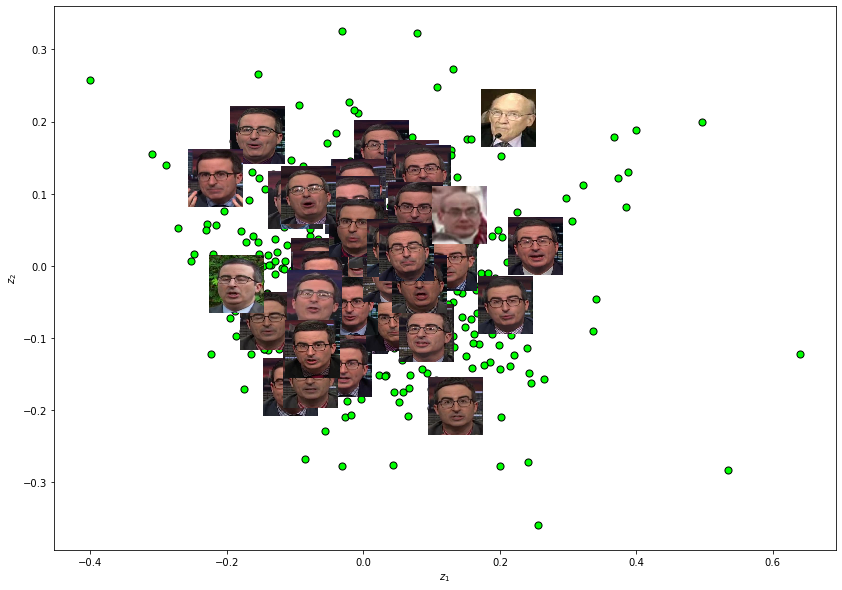

In [132]:
fig = plt.figure(figsize=(14, 10))

size = 0.04
for idx in range(2, 110, 3):
    img_path = df_sample.iloc[idx]['embedding_path'].replace('npy', 'jpg').replace('FECNet', 'Faces')
    im = cv2.imread(img_path)
    x0  = X_sample[idx,0] - size
    x1  = X_sample[idx,0] + size
    y0  = X_sample[idx,1] - size
    y1  = X_sample[idx,1] + size
#     mI  = np.reshape(mX[idx,:], vShape).T
    RGBimage = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.imshow(RGBimage, aspect='auto', zorder=1, extent=(x0, x1, y0, y1))
#     plt.imshow(im, aspect='auto', cmap='gray', zorder=1, extent=(x0, x1, y0, y1))

plt.scatter(X_sample[:,0], X_sample[:,1], s=50, c='lime', edgecolor='k')
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')
    
plt.show()

In [ ]:
X_new = pca.fit_transform(X)
